<a href="https://colab.research.google.com/github/mmb405/Machine-Learning/blob/main/Biete%2C_Michelle_Python_Classification_(SVM%2C_Random_Forest_and_Lazy_Predict).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compare Random Forest, SVM and other models (using Lazy Predict)
Learn about various classification models:
https://scikit-learn.org/stable/supervised_learning.html

Apply models to the Cell Line and TCGA datasets:
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/NormFilt_RiskFactor1_train.txt

https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_52samples_ExprData_T1.txt


Learn about accuracy metrics, feature selection, and interpretation of model results.

#Cell line breast cancer subtypes

In [28]:
data = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_52samples_ExprData_T1.txt',sep='\t',header=(0))
features = data.iloc[1:, 0].values

#add the gene id to index column
data.index = data.id

#drop or remove "id" column from the data
data=data.drop(['id'], axis = 1) 

#transpose
dataT = np.transpose(data)

#prepare train and test data
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

#save class names
classes = np.unique(y)
n_classes = len(classes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0) #random state=0 will keep the chosen samples constant even if rerun code

In [29]:
y_train

#14 Luminal, 8 Basal, 1 Normal-like, 2 Claudin-Low in training set using 50% of the dataset

array(['Luminal', 'Luminal', 'Basal', 'Luminal', 'Luminal', 'Luminal',
       'Basal', 'Luminal', 'Basal', 'Basal', 'Normal-like', 'Luminal',
       'Luminal', 'Claudin-low', 'Luminal', 'Basal', 'Luminal', 'Basal',
       'Basal', 'Claudin-low', 'Luminal', 'Luminal', 'Basal',
       'Normal-like', 'Luminal', 'Luminal'], dtype=object)

In [30]:
y_test
#14 Luminal, 8 Basal, 1 Normal-like, 2 Claudin-Low in training set using 50% of the dataset
#13 Luminal, 5 Basal, 3 Normal-like, 4 Claudin-low in test set using 50% of the dataset
#27 Lumina, 13 Basal, 4 Normal-like, 6 Claudin-Low in complete dataset

array(['Luminal', 'Luminal', 'Luminal', 'Luminal', 'Basal', 'Normal-like',
       'Claudin-low', 'Luminal', 'Claudin-low', 'Basal', 'Luminal',
       'Luminal', 'Normal-like', 'Normal-like', 'Luminal', 'Basal',
       'Luminal', 'Basal', 'Luminal', 'Luminal', 'Basal', 'Luminal',
       'Claudin-low', 'Claudin-low', 'Luminal', 'Basal'], dtype=object)

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=True)

#fit model on training data
model.fit(X_train, y_train)

#Predict test data
predictions = model.predict(X_test)
c_matrix = confusion_matrix(y_test,predictions)
#c_matrix = pd.DataFrame(c_matrix)

CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [32]:
model_accuracy

0.7307692307692307

In [33]:
clsf_report = pd.DataFrame(cr).transpose()
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

Due to the prescence of only 1 Normal-like sample and 2 Claudin-Low samples in the training set the test set wasn't able to precisely or accurately classify the 3 Normal-Like samples in the test set as shown by the F1 and precision score of 0 in the classification report. As shown by this classification report the luminal class was most accurately and precisely classified as it had an F1 score and precision value of 1 followed by the basal class which had an F1 score of 0.63 and a precision value of 0.45.

14 Luminal, 8 Basal, 1 Normal-like, 2 Claudin-Low in training set using 50% of the dataset
13 Luminal, 5 Basal, 3 Normal-like, 4 Claudin-low in test set using 50% of the dataset
27 Lumina, 13 Basal, 4 Normal-like, 6 Claudin-Low in complete dataset


In [34]:
heat = go.Heatmap(z = c_matrix, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

The luminal and basal samples were the best classified as the samples were only grouped into their actual group. However, the claudin-low and normal-like samples were also grouped into the basal group which would affect that groups overall precision and accuracy scores which is reflected in the classification report compared to the F1 and precision values of the luminal class. 

In [35]:
dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 

#Run Principal Component Analysis
n_components=4
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%' for i in range(n_components)}
template = 'ggplot2'

# x and y given as array_like objects
figPCA2D = px.scatter(xpca, x=0, y=1, color=y, 
                      labels=dataT1.index,
                      hover_name = dataT1.index,
                      title="2D PCA for Labels")
figPCA2D.update_layout(width=1000, height=800, template=template)
figPCA2D.show()

This PCA shows that the Luminal samples are the best grouped as there are no other samples within the grouping. The basal grouping is also pretty accurate except for the one Normal-like sample in the middle of the grouping. The Normal-like and Claudin-Low samples are mixed amongst themselves, therefore not forming a consistent grouping. 

In [36]:
y_test_bin_labels = label_binarize(y_test, classes=classes)

# for roc curve we are using predicted proba for our test samples
y_score = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

y_onehot = pd.get_dummies(y, columns=model.classes_)

#plot
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_score.shape[1]):
    y_true = y_onehot.iloc[:, i]
    name = f"{y_onehot.columns[i]}"
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=700, height=500,
    template = template,
    title="ROC Curve"
)
fig.show()



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


The ROC curve shows that luminal had the best model along with normal-like (value of 1). This was interesting since  none of the normal-like samples were classified correctly as shown by the confusion matrix. The next best model was the classification of claudin-low than basal. These results were also interesting since none of the claudin-low samples were classified in the correct group according to the confusion matrix and all of the basal samples were put into the correct group. However, since both the claudin-low and normal-like samples were all put into the basal group this most likely reduced the accuracy of the model. 

In [37]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

RF_df = pd.DataFrame(forest_importances.sort_values(ascending=False))
RF_df.columns = ['Feature']

#plot feature significance
fig = px.bar(RF_df[0:20], template=template)
fig.update_layout(width=1000, height=700, template=template, title="Top 20 Features by Significance")
fig.show()

In [38]:
gene = 'ENSG00000175592'
#plot feature significance
fig = px.bar(y=dataT[gene].astype('float'), x=dataT.index, color=dataT['class'], template=template)
fig.update_layout(width=1000, height=700, template=template, title=("Feature: " + gene))
fig.show()

In [39]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [40]:
import warnings
warnings.filterwarnings('ignore')

!pip install lazypredict -q

In [41]:
#import necessary modules
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

#Load Breast cancer cell line data with different subtypes. Here, we label : Normal-like = 0, Basal = 1, Luminal = 3, Claudin-low = 3, since, to run package, we need labels as numeric values
data = pd.read_table('https://raw.githubusercontent.com/pine-bio-support/ML-Demo/master/CellLines_52samples_ExprData_T1_new.txt',sep='\t',header=(0))

#Process data
data=data.drop(['id'], axis = 1) 
dataT = np.transpose(data)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


In [42]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

RidgeClassifier and RidgeClassifierCV had the best F1 scores and accuracy compared to the other classification methods. 

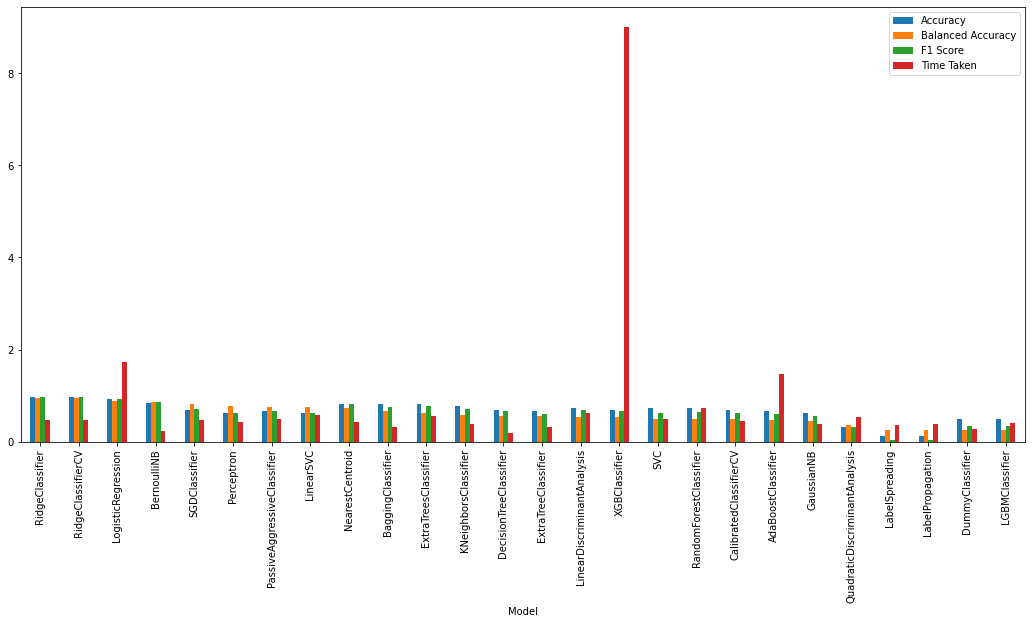

In [43]:
models_c.plot.bar(figsize = (18,8));

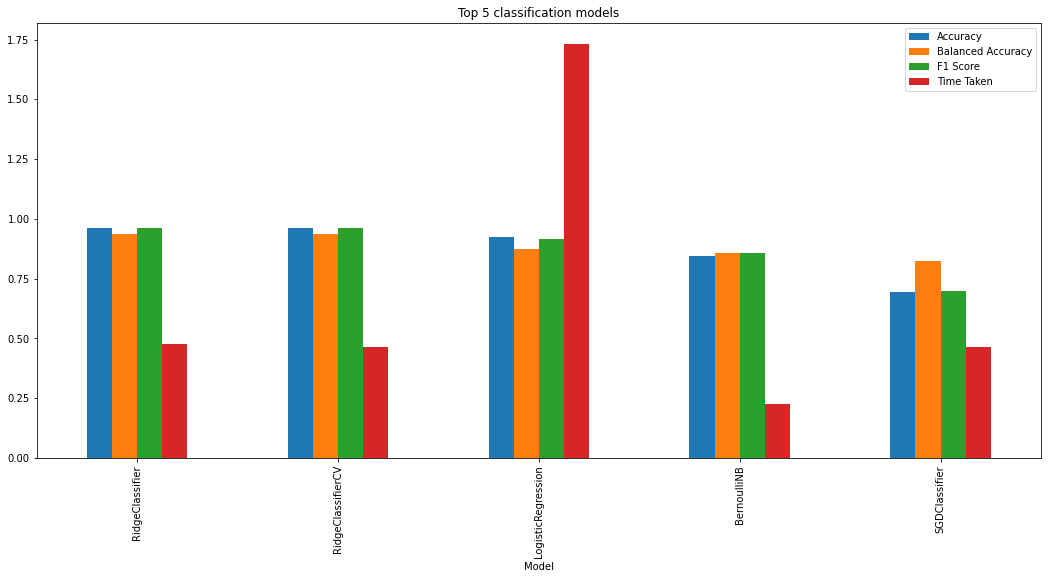

In [44]:
models_c.iloc[0:5].plot.bar(figsize = (18,8), title="Top 5 classification models");

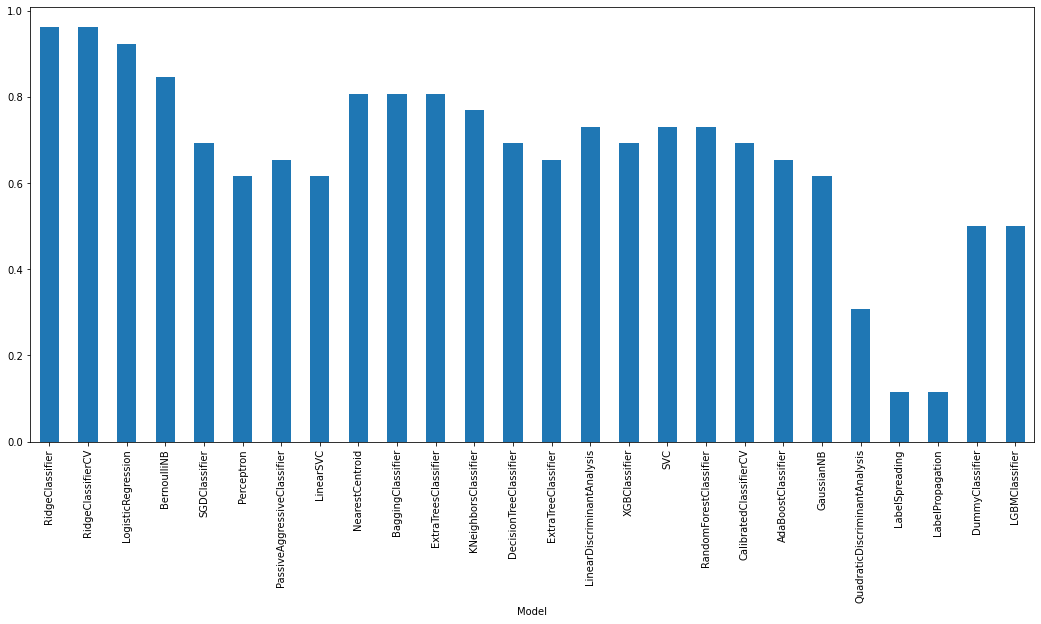

In [45]:
models_c['Accuracy'].plot.bar(figsize = (18,8));

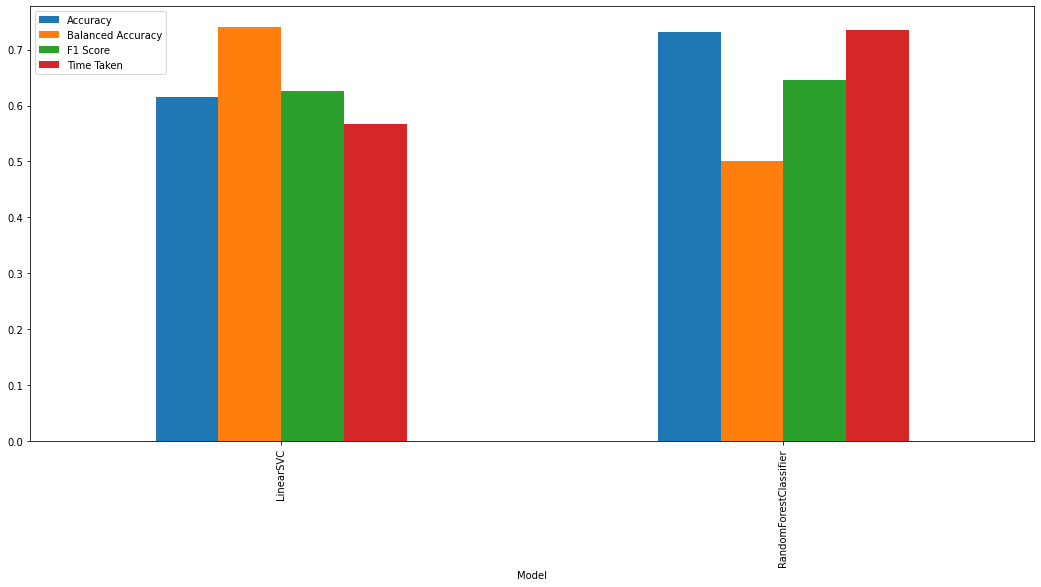

In [46]:
models_c.loc[['LinearSVC','RandomForestClassifier']].plot.bar(figsize = (18,8));

Linear SVC seemed to have a better overall balanced accuracy and F1 score compared to RandomForest Classifier. 

In [47]:
predictions_c

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
1,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
2,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
3,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,0.00,0.00,0.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00
4,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
5,1.00,0.00,0.00,1.00,1.00,2.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,2.00
6,1.00,1.00,1.00,2.00,3.00,2.00,2.00,1.00,2.00,1.00,...,3.00,3.00,1.00,1.00,3.00,3.00,3.00,2.00,3.00,2.00
7,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
8,1.00,1.00,3.00,3.00,2.00,2.00,2.00,3.00,2.00,1.00,...,3.00,3.00,2.00,1.00,3.00,3.00,3.00,1.00,1.00,2.00
9,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00


#Liver Sample Data Analysis using Obesity Class as a Risk Factor: Classification with Support Vector Machine (linear SVC), RandomForest, and LazyPredict
Linear SVC is used to separate data using a line or plane. 

In [182]:
#@title Prepare Packages and Data {run: "auto"}
#@markdown Here we will use a dataset from cancer patients with Hepatocellular Carcinoma: `The Cancer Genome Atlas`, (see [TCGA](https://portal.gdc.cancer.gov/)). <br>
#@markdown ![The Cancer Genome Atlas](https://docs.gdc.cancer.gov/Data_Portal/Users_Guide/images/GDC-Home-Page.png "TCGA") <br> 
#@markdown To learn more, visit [OmicsLogic](https://learn.omicslogic.com/) <br>

#import pandas and numpy
import pandas as pd
import numpy as np

#import standard classification tools from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

# initially SVM is a binary (two classes) classifier
# so by default multiclass problems are handled according to a "one-vs-one" scheme.
# if you want to try OneVsRest scheme - you can use OneVsRestClassifier from sklearn as a wrapper around SVC.
# import model class (SVC stands for Support Vector Classification)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale
import warnings

#import tools for ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#visualization
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

template = 'ggplot2'
test_size = 0.5

data = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/986267a6aa1f2e1061736d23dcb5ee139a44c1ff/LIHC_RSEM_42cases.txt',sep='\t',header=(0))

#prepare data
features = data.iloc[1:, 0].values
data=data.drop(['ID'], axis = 1) 
dataT = np.transpose(data)

#X is the data, y is the lables (classes)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

class_label= dataT[0]

X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

In [183]:
classes

array(['NORMAL', 'OBESE', 'OVERWEIGHT'], dtype=object)

In [184]:
 
#@markdown Support Vector Machine: sklearn.svm.SVC (C-Support Vector Classification)
#@markdown 
#@markdown Here we will use a dataset from cancer patients with Hepatocellular Carcinoma:
#@markdown 
#@markdown `The Cancer Genome Atlas`, (see [TCGA](https://portal.gdc.cancer.gov/)).
#@markdown ![Support Vector Machine](https://miro.medium.com/max/500/0*DJ_mGzidt4WqWoVm "SVM GIF")


warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# there are several useful parameters such as:
# C - Regularization parameter. The strength of the regularization.
# kernel - Specifies the kernel type to be used in the algorithm
# we will use a linear kernel, it is the only kernel which allows us to use features selection
model = LinearSVC(C=1.0) #C is the regularization parameter
model.fit(X_train, y_train)

# after training we can predict labels for the test samples
predictions = model.predict(X_test)

c_matrix = confusion_matrix(y_test,predictions)
cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

In [185]:
model_accuracy 

0.1875

The percent of the data accurately represented by the model using a test dataset size of 30% is 30%, if this is adjusted to 0.7 the model accuracy is 0.34, and if it is 50% the model accuracy is also around 0.375. Therefore, I chose to use a test size of 0.5 for the analysis of this dataset. 

In [186]:
print(y_train)
print(y_test)

# Test size was 0.3:
#6 overweight, 7 obese, 9 normal for train set, 70% of dataset
#4 overweight, 6 normal, 0 obese for test set, 30% of data
#10 overweight, 7 obese, 15 normal in total dataset

#Test size was 0.5:
#3 overweight, 4 obese, 9 normal for train set, 70% of dataset
#7 overweight, 6 normal, 3 obese for test set, 30% of data
#10 overweight, 7 obese, 15 normal in total dataset

['OVERWEIGHT' 'OVERWEIGHT' 'NORMAL' 'NORMAL' 'OVERWEIGHT' 'NORMAL'
 'NORMAL' 'OVERWEIGHT' 'OBESE' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL' 'NORMAL']
['OVERWEIGHT' 'OVERWEIGHT' 'OVERWEIGHT' 'OBESE' 'OBESE' 'NORMAL'
 'OVERWEIGHT' 'OBESE' 'OBESE' 'NORMAL' 'OVERWEIGHT' 'OBESE' 'NORMAL'
 'OBESE' 'OVERWEIGHT' 'NORMAL']


Classification Results

In [187]:
#@markdown Training Results {run: "auto"} </br>
#@markdown Learn more about each one of these terms here, [OmicsLogic](https:learn.omicslogic.com)).
#@markdown ![Annotation](https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png "Annotation")


clsf_report = pd.DataFrame(cr).transpose()
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

Results for test size of 30%:
This classification report shows that there were 6 normal samples in the test set and that the model has a 0.5 value for precision and a 0.25 f1 score that correlates with accuracy for an imbalanced dataset. The overweight classification results show that there were 4 samples in the test set with an f1 score and precision value of 0.5. The obese samples were not present in the test set. This shows the imbalance in the number of samples in each class as there was a total of 15 normal samples, 9 overweight samples, and 7 obese samples in the dataset. However, because the training set used 70% of the dataset all of the obese samples were in the training set along with 6 overweight samples, and 9 normal samples. This shows the imbalance in the test and training sets and their effect on the accuracy and precision of the model but the inability to properly validate the model using the test set of data. 
6 overweight, 7 obese, 9 normal for train set, 70% of dataset
4 overweight, 6 normal, 0 obese for test set, 30% of data
10 overweight, 7 obese, 15 normal in total dataset

Results for test size of 50%:
Based on this new model the f1 values went up for the normal class but down for the overweight class, and all the scores stayed 0 for the obese class despite having 4 obese samples in the training set and 3 obese samples in the test set. The precision values for both the normal and overweight class remained the same at 0.5. The recall for the dataset was also pretty low in the overweight set and 0.65 in the normal class. 
3 overweight, 4 obese, 9 normal for train set, 70% of dataset
7 overweight, 6 normal, 3 obese for test set, 30% of data
10 overweight, 7 obese, 15 normal in total dataset

F1 score: Score that takes imbalanced dataset into consideration when calculating the accuracy to be more accurate than a regular accuracy value

Support: Number of samples in the dataset class

Recall: The ability for the model to accurately classify each sample into the correct group- true positives/total true positives and false negatives. 

Precision: Ability to correctly identify sample into it's class. 



Text(0, 0.5, 'cumulative explained variance')

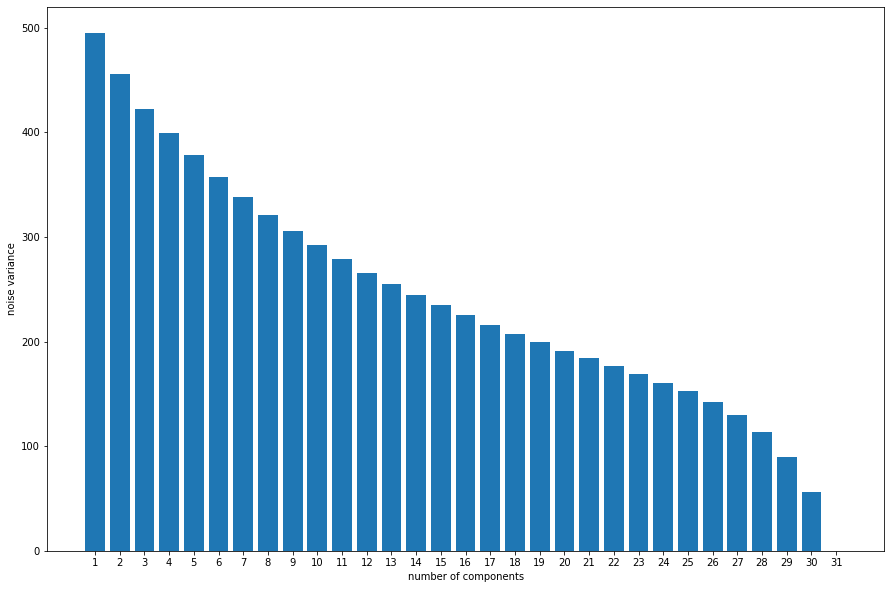

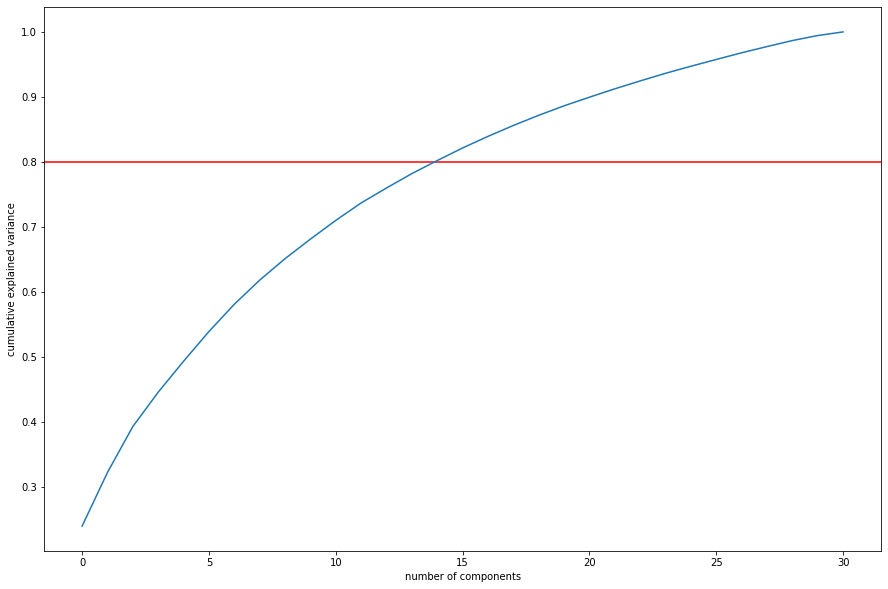

In [188]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 


#Run Principal Component Analysis
n_components= 32 #number of samples in dataset-1 is the maximum amount of components that can be used
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)


#create a dataframe with noise and number of components
df1 = pd.DataFrame()
for i in range (1,pca.n_components_):
  pca_all = PCA(n_components=i) 
  pca_all.fit(scaled_data)
  df1 = df1.append({'comps':i,'noise': pca_all.noise_variance_}, ignore_index=True)

plt.figure(figsize=(15, 10))
plt.bar(df1.comps, df1.noise)
plt.xlabel('number of components')
plt.ylabel('noise variance')
plt.xticks(np.arange(min(df1.comps), max(df1.comps)+1, 1.0));

#plot
plt.figure(figsize=(15, 10))
plt.axhline(y = 0.8, color = 'r', linestyle = '-')
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [189]:
dataT1.head()

,1,2,3,4,5,6,7,8,9,10,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
TCGA_DD_A1EC_01A,0,9.2,8.8,144,2545,0,253,0,0,0,...,54.00,1196.00,1635.00,2.00,2220.00,12725.00,4548.00,1494.00,8.00,1.00
TCGA_ES_A2HT_01A,0,0,3,104.55,2044,0,54,0,0,0,...,30.00,470.00,690.00,8.00,490.00,5090.00,963.00,271.00,4.00,33.00
TCGA_DD_A3A8_01A,0,2,0,196.73,1579,0,161,0,0,0,...,24.00,251.00,1039.00,41.00,1930.00,1877.00,836.00,547.00,1.00,206.00
TCGA_DD_A1EL_01A,0,8,5,614.74,4455,0,437,1,0,0,...,87.00,815.00,2717.00,110.00,2877.00,3098.00,2076.00,1780.00,14.00,247.00
TCGA_DD_A3A3_01A,0,3.15,1.85,54.87,1069,0,113,0,0,0,...,11.00,212.00,627.00,7.00,554.00,2584.00,182.00,284.00,0.00,8.00


Results for test size of 50%:
The optimal number of components is around 14 as that is when 80% of the variance is explained by the model. 

In [190]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 

#Run Principal Component Analysis
n_components=14
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%' for i in range(n_components)}
template = 'ggplot2'

# x and y given as array_like objects
figPCA2D = px.scatter(xpca, x=0, y=1, color=y, 
                      labels=dataT1.index,
                      hover_name = dataT1.index,
                      title="2D PCA for Labels")
figPCA2D.update_layout(width=1000, height=800, template=template)
figPCA2D.show()

Results for test size of 50%:
Based on the PCA graph there are no clear groupings of the different classes in this dataset. 

In [191]:
CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

heat = go.Heatmap(z = CM_df, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

Results for test size of 30%:
This confusion matrix shows that the classification of the samples wasn't very accurate as the 6 normal samples also fall into the obese and overweight category and the 4 overweight samples are also in the normal and obese categories. The confusion matrix also shows that there weren't any obese samples in the training set showing that the percentage of the dataset used for the training set should be adjusted to increase the accuracy of the model. 

6 overweight, 7 obese, 9 normal for train set, 70% of dataset
4 overweight, 6 normal, 0 obese for test set, 30% of data
10 overweight, 7 obese, 15 normal in total dataset

Results for test size of 50%:
The new confusion matrix shows that most of the normal samples are in the normal category with only 1 sample in the obese and overweight categories, only 2 of the overweight samples were classified as overweight, and none of the obese samples were classified in the obese category which was interesting, but consistent with the lack of groupings in the PCA. 

3 overweight, 4 obese, 9 normal for train set, 70% of dataset
7 overweight, 6 normal, 3 obese for test set, 30% of data
10 overweight, 7 obese, 15 normal in total dataset

In [192]:
##ROC Curve
# to make roc curve we should binarize our class labels to “one hot” vectors, so each class represent binary vector
# for example: first class = [1, 0, 0, 0], second = [0, 1, 0, 0], ...
y_test_bin_labels = label_binarize(y_test, classes=classes)

# for roc curve we are using predicted proba for our test samples
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

y_onehot = pd.get_dummies(y, columns=model.classes_)

#plot
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_score.shape[1]):
    y_true = y_onehot.iloc[:, i]
    name = f"{y_onehot.columns[i]}"
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=700, height=500,
    template = template,
    title="ROC Curve"
)
fig.show()

Based on the ROC curve the overweight classification is better than the other classes as the value for the true positive rate is 100% and the false positive rate is 0% while the other classes don't reach this standard. 

In [193]:
# the weights obtained from svm.coef_ represent the vector coordinates
# which are orthogonal to the hyperplane and their direction indicates the predicted class.
# this is only available in the case of a linear kernel

top_features_count = 20

# we use median of weights from all classes, you can also use np.sum(np.abs(model.coef_, axis=0))
vector_weights = np.median(model.coef_, axis=0)
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]

d = {'Features':features[top_coefficients], 'Weight':vector_weights[top_coefficients]}
df_features = pd.DataFrame(d)

#plot feature significance
fig = px.bar(y=df_features.Features, x=df_features.Weight, template=template)
fig.update_layout(width=700, height=1000, template=template, title="Feature Significance")
fig.show()

Based on this feature selection ENSG00000185885, ENSG00000167755, ENSG00000198848, ENSG00000118848, and ENSG00000101443 affect the model the most. 

Random Forest

In [194]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [195]:
import warnings
warnings.filterwarnings('ignore')

!pip install lazypredict -q

In [196]:
#import necessary modules
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor


data = pd.read_table('https://raw.githubusercontent.com/mmb405/Machine-Learning/main/LIHC_RSEM_42cases%20copy.txt',sep='\t',header=(0))

#Process data
features = data.iloc[1:, 0].values #set genes as features
data=data.drop(['ID'], axis = 1) 
dataT = np.transpose(data)



data.head()

,TCGA_DD_A1EC_01A,TCGA_ES_A2HT_01A,TCGA_DD_A3A8_01A,TCGA_DD_A1EL_01A,TCGA_DD_A3A3_01A,TCGA_EP_A3RK_01A,TCGA_DD_A11D_01A,TCGA_DD_A39X_01A,TCGA_DD_A11C_01A,TCGA_DD_A11B_01A,...,TCGA_BC_A10Y_01A,TCGA_DD_A1EJ_01A,TCGA_DD_A118_01A,TCGA_DD_A1EH_01A,TCGA_BC_A110_01A,TCGA_EP_A26S_01A,TCGA_DD_A39V_01A,TCGA_DD_A39W_01A,TCGA_DD_A3A2_01A,TCGA_DD_A3A4_01A
0,0.00,1.00,2.00,0.00,1.00,2.00,0.00,0.00,2.00,2.00,...,1.00,1.00,1.00,0.00,2.00,0.00,1.00,0.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,9.20,0.00,2.00,8.00,3.15,3.31,2.26,3.75,11.18,12.91,...,20.12,33.47,7.28,21.72,0.00,11.42,3.96,1.67,4.23,0.00
3,8.80,3.00,0.00,5.00,1.85,8.69,3.74,6.25,10.82,4.09,...,7.88,16.53,8.72,19.28,3.00,1.58,2.04,3.33,5.77,7.00
4,144.00,104.55,196.73,614.74,54.87,160.63,69.86,225.26,167.17,229.61,...,369.28,296.27,64.00,326.15,65.90,286.78,126.07,216.06,128.60,116.57


In [197]:
dataT = np.transpose(data)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


In [198]:
dataT

,0,1,2,3,4,5,6,7,8,9,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
TCGA_DD_A1EC_01A,0.00,0.00,9.20,8.80,144.00,2545.00,0.00,253.00,0.00,0.00,...,54.00,1196.00,1635.00,2.00,2220.00,12725.00,4548.00,1494.00,8.00,1.00
TCGA_ES_A2HT_01A,1.00,0.00,0.00,3.00,104.55,2044.00,0.00,54.00,0.00,0.00,...,30.00,470.00,690.00,8.00,490.00,5090.00,963.00,271.00,4.00,33.00
TCGA_DD_A3A8_01A,2.00,0.00,2.00,0.00,196.73,1579.00,0.00,161.00,0.00,0.00,...,24.00,251.00,1039.00,41.00,1930.00,1877.00,836.00,547.00,1.00,206.00
TCGA_DD_A1EL_01A,0.00,0.00,8.00,5.00,614.74,4455.00,0.00,437.00,1.00,0.00,...,87.00,815.00,2717.00,110.00,2877.00,3098.00,2076.00,1780.00,14.00,247.00
TCGA_DD_A3A3_01A,1.00,0.00,3.15,1.85,54.87,1069.00,0.00,113.00,0.00,0.00,...,11.00,212.00,627.00,7.00,554.00,2584.00,182.00,284.00,0.00,8.00
TCGA_EP_A3RK_01A,2.00,0.00,3.31,8.69,160.63,2219.00,0.00,107.00,0.00,0.00,...,62.00,1037.00,1394.00,1.00,1489.00,6402.00,1243.00,763.00,10.00,87.00
TCGA_DD_A11D_01A,0.00,0.00,2.26,3.74,69.86,762.00,0.00,36.00,0.00,0.00,...,31.00,315.00,723.00,21.00,1222.00,4185.00,316.00,358.00,2.00,74.00
TCGA_DD_A39X_01A,0.00,0.00,3.75,6.25,225.26,2707.00,0.00,98.00,0.00,0.00,...,27.00,602.00,1832.00,25.00,880.00,6012.00,1181.00,343.00,3.00,588.00
TCGA_DD_A11C_01A,2.00,0.00,11.18,10.82,167.17,1348.00,0.00,39.00,0.00,3.00,...,93.00,3202.00,2057.00,4.00,3657.00,4425.00,1175.00,1342.00,11.00,107.00
TCGA_DD_A11B_01A,2.00,0.00,12.91,4.09,229.61,1975.00,0.00,73.00,0.00,0.00,...,51.00,627.00,1471.00,16.00,1533.00,4591.00,2312.00,877.00,5.00,150.00


In [199]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

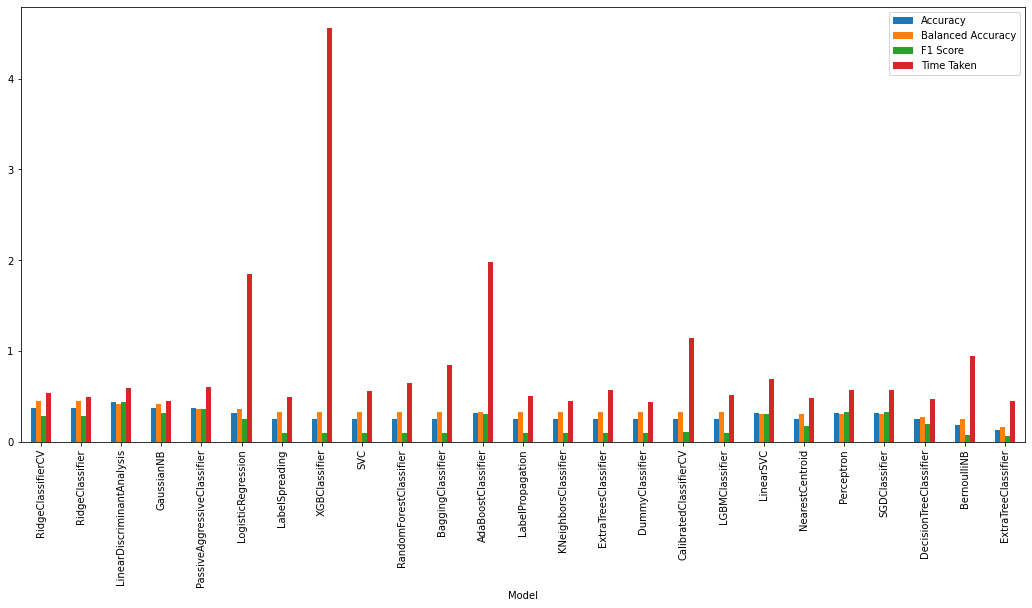

In [200]:
models_c.plot.bar(figsize = (18,8));

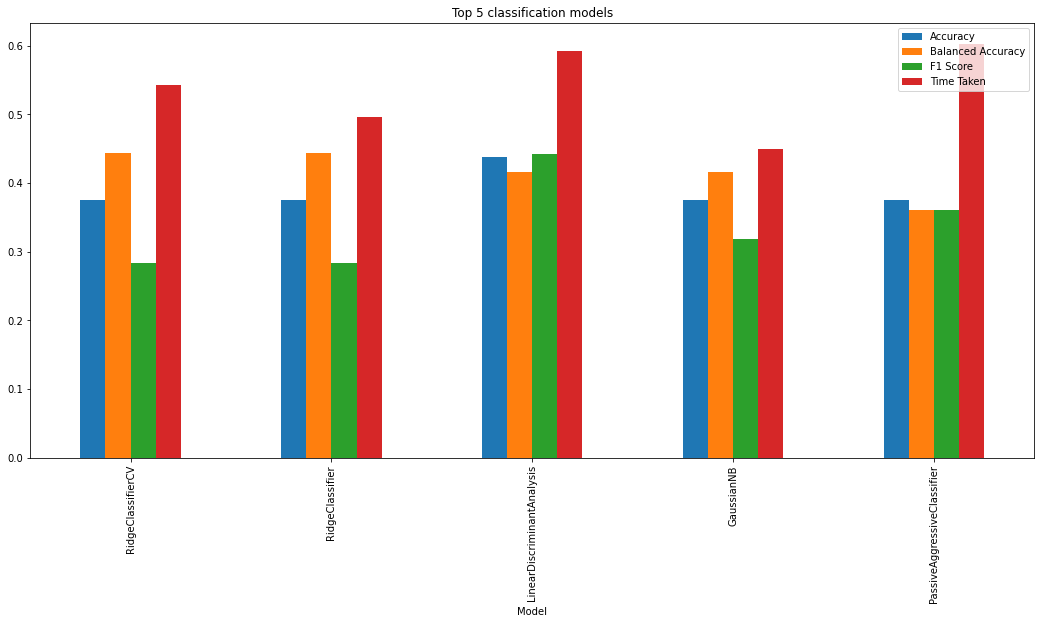

In [201]:
models_c.iloc[0:5].plot.bar(figsize = (18,8), title="Top 5 classification models");

RidgeClassifier, RidgeClassifierCV, and LinearDiscriminantAnalysis had the best F1 scores compared to the other classification methods with reasonable balanced accuracy compared to the other models that had lower F1 scores (GaussianNB and PassiveAggressiveClassifier). 

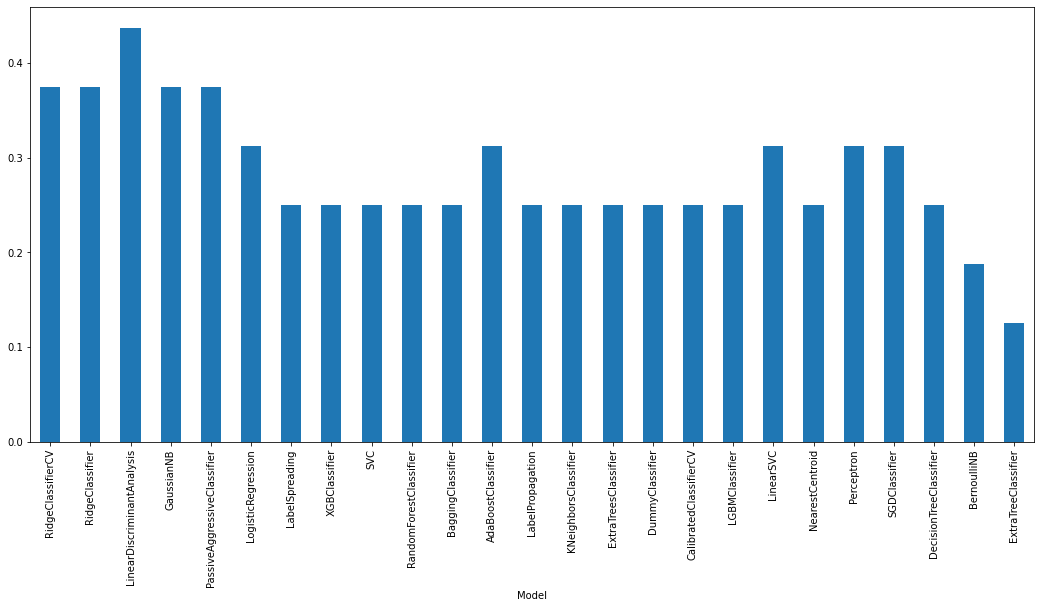

In [202]:
models_c['Accuracy'].plot.bar(figsize = (18,8));

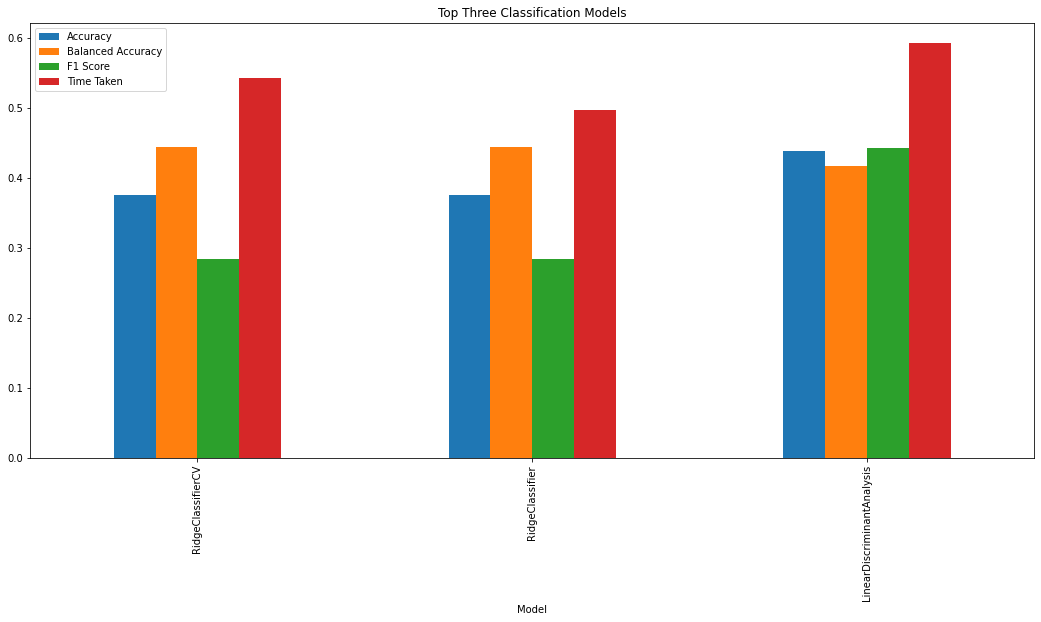

In [203]:
models_c.loc[['RidgeClassifierCV', 'RidgeClassifier', 'LinearDiscriminantAnalysis']].plot.bar(figsize = (18,8), title='Top Three Classification Models');

In [204]:
predictions_c

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,NearestCentroid,PassiveAggressiveClassifier,Perceptron,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [205]:
LinearDiscriminantAnalysis=predictions_c['LinearDiscriminantAnalysis']
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, LinearDiscriminantAnalysis)
print(cm)
accuracy_score(y_test,LinearDiscriminantAnalysis)

[[1 3 0]
 [2 4 0]
 [2 2 2]]


0.4375

In [206]:
RidgeClassifierCV=predictions_c['RidgeClassifierCV']
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, RidgeClassifierCV)
print(cm)
accuracy_score(y_test, RidgeClassifierCV)


[[4 0 0]
 [4 2 0]
 [5 1 0]]


0.375

In [207]:
RidgeClassifier=predictions_c['RidgeClassifier']
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, RidgeClassifier)
print(cm)
accuracy_score(y_test, RidgeClassifier)

[[4 0 0]
 [4 2 0]
 [5 1 0]]


0.375

In [208]:
RandomForestClassifier=predictions_c['RandomForestClassifier']
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, RandomForestClassifier)
print(cm)
accuracy_score(y_test, RandomForestClassifier)

[[4 0 0]
 [6 0 0]
 [6 0 0]]


0.25

In [209]:
LinearSVC=predictions_c['LinearSVC']
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, LinearSVC)
print(cm)
accuracy_score(y_test, LinearSVC)

[[1 1 2]
 [1 3 2]
 [3 2 1]]


0.3125

RidgeClassifierCV: F1 score 0.2843137, model accuracy 0.9615385
RidgeClassifier: F1 score 0.2843137, model accuracy 0.9615385
LinearDiscriminantAnalysis: F1 score 0.4430556, model accuracy 0.7307692

# Summary

In order to determine if obesity class is accurate in grouping patients to further identify patterns in the development of liver cancer or drug response, I used linear SVM, random forest, and lazy predict to classify patients into normal, overweight, and obese classes to see if there were common gene expression patterns associated between the liver cancer patients in each group. Based on these three methods, the best model predictors were RidgeClassifier (F1 score 0.2843137, model accuracy 0.9615385), RidgeClassifierCV (F1 score 0.2843137, model accuracy 0.9615385), and LinearDiscriminantAnalysis (F1 score 0.4430556, model accuracy 0.7307692) as they had the highest overall F1 and model accuracy scores. Based on the feature selection, the following genes affect the model the most: ENSG00000185885, ENSG00000167755, ENSG00000198848, ENSG00000118848, and ENSG00000101443. ENSG00000185885 or IFITM1 encodes for interferon-induced transmembrane protein (Gessani & Belardelli, 2021). This gene is stimulated by type 1 interferons (IFN-1), which regulates tumor growth and obesity (Gessani & Belardelli, 2021). IFITM1 is also associated with increased CRC risk, metastasis, and patient survival (Gessani & Belardelli, 2021). Therefore the signifiance in the classification model may show that it's activity may play a role in also detecting or calculating a prognosis in obese patients with liver cancer (Gessani & Belardelli, 2021). Currently, there is no association between kallikrein gene 6 or KLK6 (ENSG00000167755) gene expression, obesity, and liver cancer (Pandey et al., 2021). It has been shown in patients with colorectal cancer that high levels of KLK6 expression are associated with low overall survival and liver metastasis (Pandey et al., 2021). Therefore, there may also be a connection between KLK6 expression and liver cancer (Pandey et al., 2021). CES1 or carboxylesterase 1 (ENSG00000198848) is a gene that is highly expressed in the liver as it plays a major role in fatty acid and cholesterol metabolism (Bing bing et al., 2021). Several studies have shown that increased protein expression of CES1 was positively correlated with obesity (Bing bing et al., 2021). Another study showed that elevated CES1 expression also correlated with worse outcomes in overweight colorectal cancer patients (Capece et al., 2021). WFDC2 (ENSG00000101443)or human epididymis protein-4 (protease inhibitor), is an ovarian cancer clinical biomarker and has been associated with lowered survival in ovarian cancer patients (Chen et al., 2019). The mechanism in which WFDC2 works in ovarian, lung, liver, and breast cancer is not well understood however it is suggested that WFDC2 expression leads to the activation of AKT signaling and therefore enhances invasion, migration, and metastasis of ovarian cancer cells (Chen et al., 2019). This mechanism may also be the same in other cancer types as WFCD2 is also expressed in liver cancer (Chen et al., 2019). There hasn't been a connection between WFCD2, liver cancer, and obesity (Chen et al., 2019). Lastly, I wasn't able to locate ENSG00000118848 gene on the NCBI or Ensembl database, therefore, its sequence may not have been reported yet, and research should be conducted to further understand its role. Overall, based on the PCA plot, the groupings are unclear unless they are better seen using different principal components than the ones chosen for visualization and the confusion matrix for the model shows the inability to accurately classify the samples into the correct category. These main points highlight that the genes selected and discussed may not necessarily be associated with the obesity risk factor and may just be characteristic of patients with liver cancer. However, further analysis should be conducted to understand the risk factor of obesity in patients with liver cancer as not much research has been able to identify significant associations or abnormalities in gene expression in obese/overweight liver cancer patients compared to normal-weight liver cancer patients.


References:
Capece, D., D’Andrea, D., Begalli, F., Goracci, L., Tornatore, L., Alexander, J. L., Di Veroli, A., Leow, S.-C., Vaiyapuri, T. S., Ellis, J. K., Verzella, D., Bennett, J., Savino, L., Ma, Y., McKenzie, J. S., Doria, M. L., Mason, S. E., Chng, K. R., Keun, H. C., … Franzoso, G. (2021). Enhanced triacylglycerol catabolism by carboxylesterase 1 promotes aggressive colorectal carcinoma. Journal of Clinical Investigation, 131(11). https://doi.org/10.1172/jci137845 
Chen, B. bing, Yan, J. hui, Zheng, J., Peng, H. wei, Cai, X. ling, Pan, X. ting, Li, H. quan, Hong, Q. zhu, &amp; Peng, X.-E. (2021). Copy number variation in the CES1 gene and the risk of non-alcoholic fatty liver in a Chinese Han population. Scientific Reports, 11(1). https://doi.org/10.1038/s41598-021-93549-2 
Chen, Y., Huang, L., Wang, S., Li, J.-L., Li, M., Wu, Y., &amp; Liu, T. (2019). WFDC2 contributes to epithelial–mesenchymal transition (EMT) by activating AKT signaling pathway and regulating MMP-2 expression. Cancer Management and Research, Volume 11, 2415–2424. https://doi.org/10.2147/cmar.s192950 
Gessani, S., &amp; Belardelli, F. (2021). Type I interferons as joint regulators of tumor growth and obesity. Cancers, 13(2), 196. https://doi.org/10.3390/cancers13020196 
Pandey, R., Zhou, M., Chen, Y., Darmoul, D., Kisiel, C. C., Nfonsam, V. N., &amp; Ignatenko, N. A. (2021). Molecular pathways associated with Kallikrein 6 overexpression in colorectal cancer. Genes, 12(5), 749. https://doi.org/10.3390/genes12050749 


